<a href="https://colab.research.google.com/github/stevengregori92/NeuralNetwork/blob/main/Feature_Importance_with_Weight_in_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji #library untuk machine learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=5e95aac68cab16a85840d7face587a4fe0633f6bc11e15a33f842b463f55e0d5
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=b49ac5dfba70630ccabb56497140616abdf3984a786403bf7504fda569f5d2dd
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [3]:
import torch
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

#Import Dataset

In [4]:
!gdown https://drive.google.com/uc?id=1afNS70irJiK_5I_ow47pdBl4Kfs9bBBQ

Downloading...
From: https://drive.google.com/uc?id=1afNS70irJiK_5I_ow47pdBl4Kfs9bBBQ
To: /content/Cancer.zip
100% 49.8k/49.8k [00:00<00:00, 72.4MB/s]


In [5]:
!unzip /content/Cancer.zip

Archive:  /content/Cancer.zip
  inflating: breast-cancer.csv       


In [6]:
df = pd.read_csv('breast-cancer.csv', index_col='id')
pd.options.display.max_columns=50
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


#Data Visualize

In [7]:
import seaborn as sns

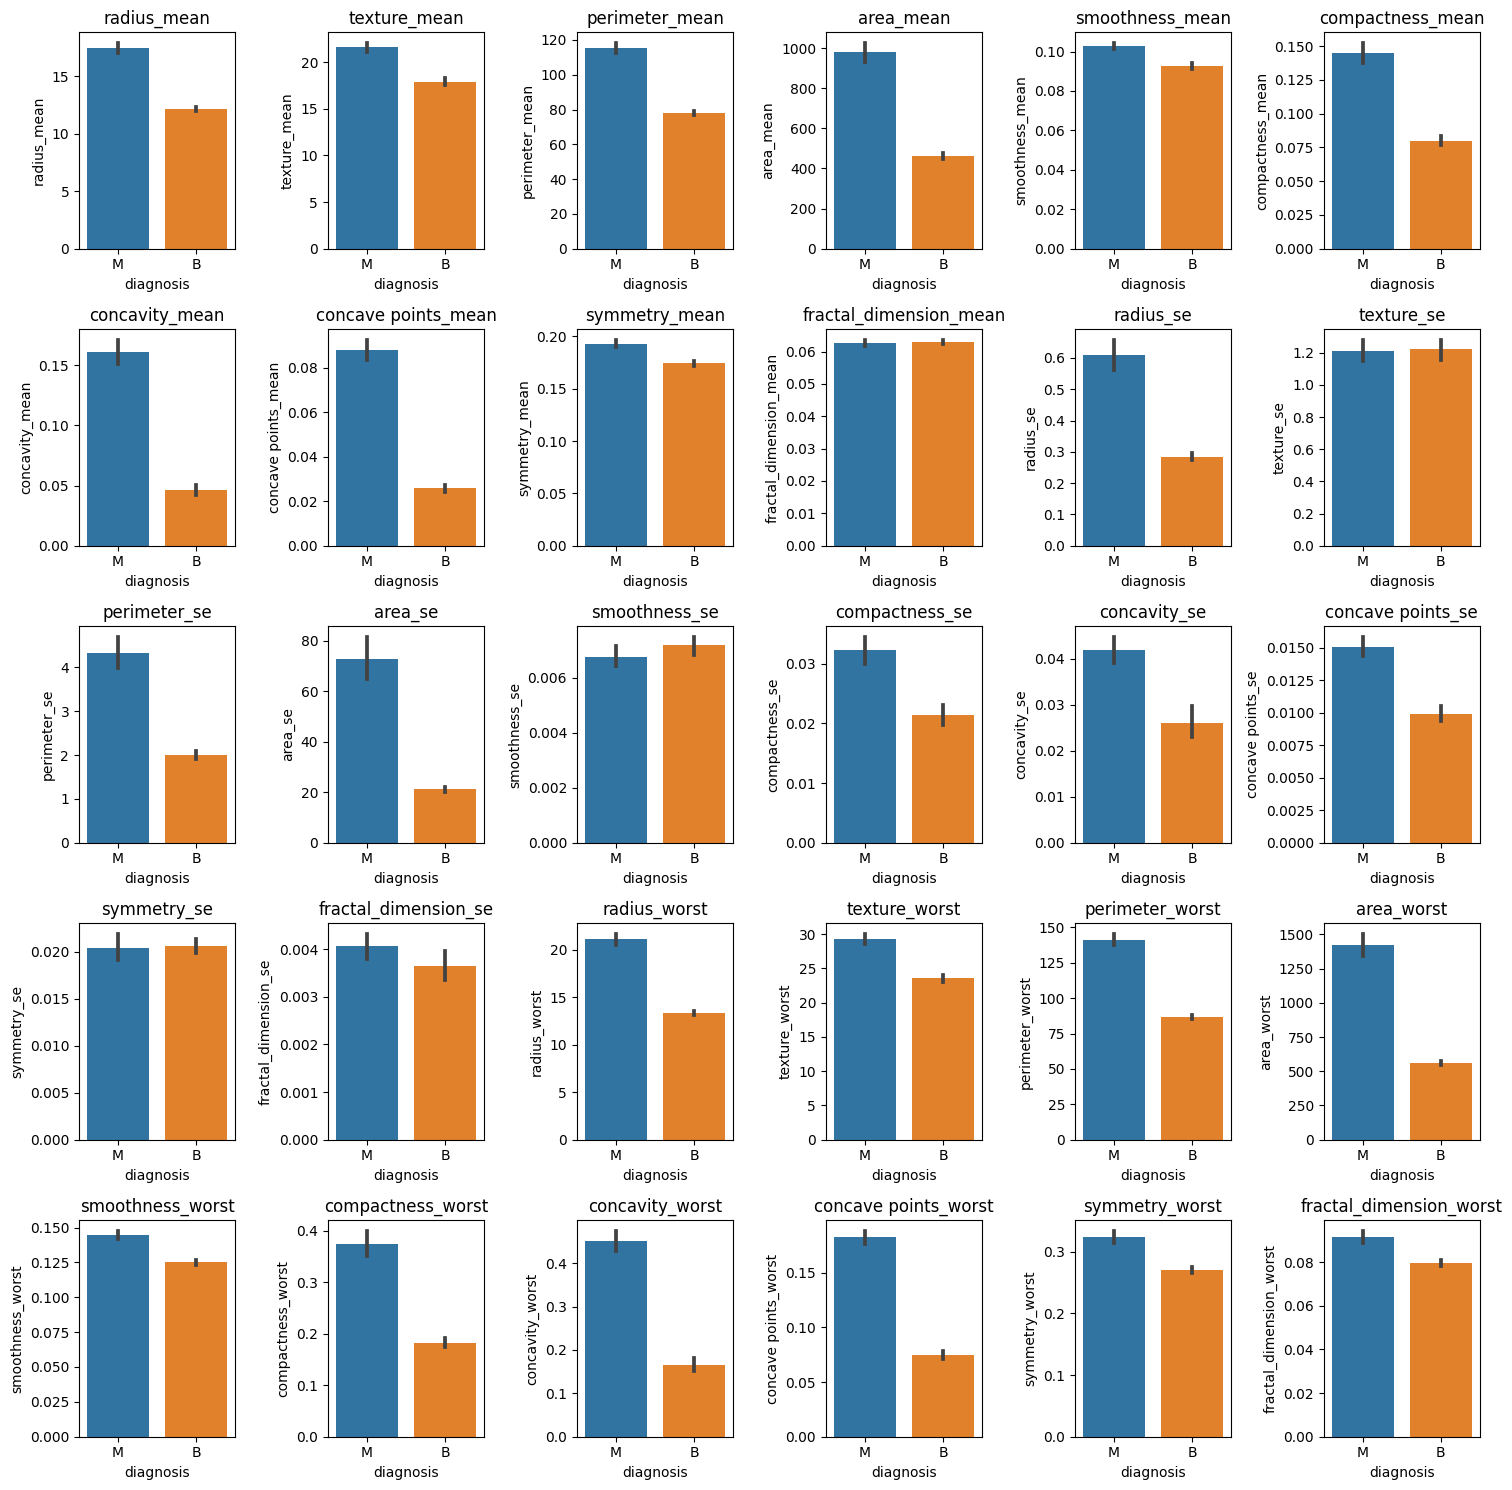

In [8]:
fig, axes = plt.subplots(5, 6, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns and create a bar plot for each column
for i, col in enumerate(df.columns[1:31]):
    ax = axes[i]  # Get the current axis
    sns.barplot(x='diagnosis', y=col, data=df, ax=ax)  # Create the bar plot
    ax.set_title(col)  # Set the title for the subplot

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#Cleaning Dataset

,missing_value,%
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0
symmetry_mean,0,0.0


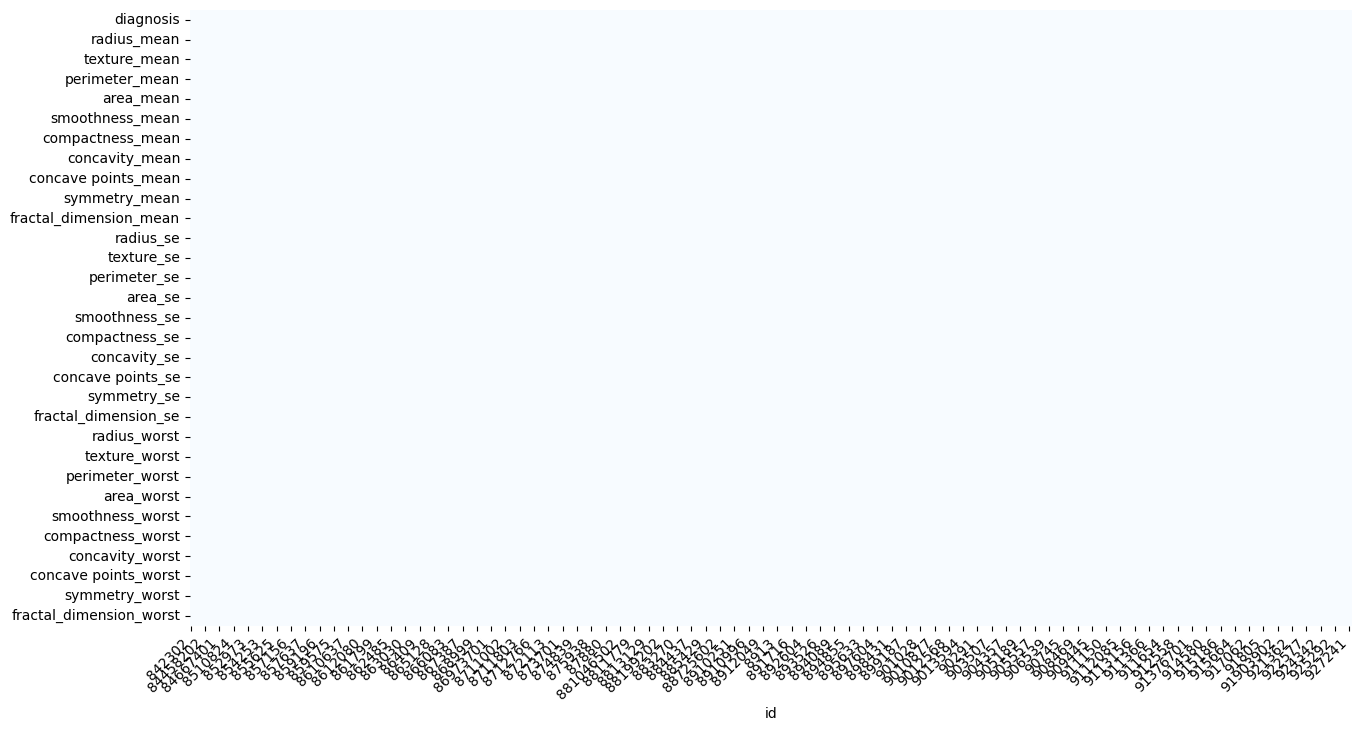

In [9]:
plot_missing_value(df, return_df = True)

In [10]:
df['diagnosis'] = df['diagnosis'].replace(['B', 'M'], [0, 1])

In [11]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

#Dataset Splitting

In [12]:
X = df.drop(columns=['diagnosis'])
y = df.diagnosis.values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

#Preprocess Data

In [13]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

# Apply preprocessing to the training and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [14]:
import tensorflow as tf

In [15]:
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#Training

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
# Create the neural network model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=30, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=64)

# Evaluate the model on the test set
model.evaluate(X_test, y_test, batch_size=64)

Epoch 1/1000
8/8 [==============================] - 2s 4ms/step - loss: 9.7390 - accuracy: 0.4769
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.0671 - accuracy: 0.4923
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.3026 - accuracy: 0.8352
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.8484
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8769
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2786 - accuracy: 0.9143
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2601 - accuracy: 0.9143
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2543 - accuracy: 0.9187
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.9143
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.9209
Epoch 11/1000
8/8 [

[0.1662338525056839, 0.9122806787490845]

#Confusion Matrix

In [18]:
# Assuming you have trained your model and obtained predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
y_true_labels = np.argmax(y_test, axis=1)  # Convert true labels from one-hot encoded to class labels

# Compute evaluation metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
specificity = recall_score(y_true_labels, y_pred_labels, pos_label=0)
f1 = f1_score(y_true_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)

4/4 [==============================] - 0s 3ms/step
Accuracy: 0.9122807017543859
Precision: 1.0
Recall: 0.7619047619047619
Specificity: 1.0
F1 Score: 0.8648648648648648


#Feature Selection

In [19]:
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Compute the absolute sum of weights along each feature
feature_importance = np.sum(np.abs(weights), axis=0)

# Get the column names after preprocessing
numeric_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']  # Provide column names explicitly

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': numeric_features, 'Importance': feature_importance})

# Sort the DataFrame by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                    Feature  Importance
4           smoothness_mean   25.472143
19     fractal_dimension_se   24.639671
23               area_worst   23.782837
5          compactness_mean   23.456160
22          perimeter_worst   23.334349
27     concave points_worst   23.162502
1              texture_mean   22.740767
0               radius_mean   22.365803
8             symmetry_mean   22.017509
25        compactness_worst   21.978046
11               texture_se   21.871269
26          concavity_worst   21.787607
16             concavity_se   21.468716
7       concave points_mean   20.277811
12             perimeter_se    9.861085
14            smoothness_se    9.107792
24         smoothness_worst    8.548701
17        concave points_se    5.397187
20             radius_worst    5.375932
21            texture_worst    5.187006
13                  area_se    5.161758
10                radius_se    5.034608
29  fractal_dimension_worst    4.826547
9    fractal_dimension_mean    4.628316


#Import Dataset

In [20]:
df = pd.read_csv('breast-cancer.csv', index_col = 'id')
pd.options.display.max_columns=50
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


#Cleaning Dataset

In [21]:
df['diagnosis'] = df['diagnosis'].replace(['B', 'M'], [0, 1])

#Dataset Splitting

In [22]:
X = df.drop(columns=['diagnosis'])
y = df.diagnosis.values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

#Preprocess Data

In [23]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['smoothness_mean', 'fractal_dimension_se', 'area_worst',
                             'compactness_mean', 'perimeter_worst', 'concave points_worst',
                             'texture_mean', 'radius_mean', 'symmetry_mean',
                             'compactness_worst', 'texture_se', 'concavity_worst',
                             'concavity_se', 'concave points_mean'])
])

# Apply preprocessing to the training and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Create the neural network model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=30, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=64)

# Evaluate the model on the test set
model.evaluate(X_test, y_test, batch_size=64)

Epoch 1/1000
8/8 [==============================] - 1s 3ms/step - loss: 3.9929 - accuracy: 0.3736
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.8994 - accuracy: 0.3736
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.7453 - accuracy: 0.2659
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.5868
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6440
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.6945
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7407
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.6857
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.7363
Epoch 10/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.5728 - accuracy: 0.7670
Epoch 11/1000
8/8 [

[0.08151108026504517, 0.9649122953414917]

#Confusion Matrix

In [25]:
# Assuming you have trained your model and obtained predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
y_true_labels = np.argmax(y_test, axis=1)  # Convert true labels from one-hot encoded to class labels

# Compute evaluation metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
specificity = recall_score(y_true_labels, y_pred_labels, pos_label=0)
f1 = f1_score(y_true_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)

4/4 [==============================] - 0s 6ms/step
Accuracy: 0.9649122807017544
Precision: 0.9523809523809523
Recall: 0.9523809523809523
Specificity: 0.9722222222222222
F1 Score: 0.9523809523809523
